## Clustering on Nutrient Composition

In [1]:
#Importing all the necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To enable plotting in Jupyter Notebook
%matplotlib inline

In [2]:
#Read the csv file to a pandas dataframe
df = pd.read_csv('nutrientcomposition_new.csv')
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [3]:
#Size of the dataframe
df.shape

(1746, 6)

In [4]:
#Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 6 columns):
S.No        1746 non-null int64
Protein     1746 non-null float64
Fat         1746 non-null float64
vitaminC    1746 non-null float64
Fibre       1746 non-null float64
Product     1746 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 81.9+ KB


#### No missing values. Good to go.

In [5]:
#Descriptive Statistics
df.describe()

,S.No,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000
mean,873.500000,0.922470,0.900091,0.900146,0.900830
std,504.171102,0.627128,0.634617,0.623847,0.626875
min,1.000000,0.000128,0.000267,0.000029,0.002579
25%,437.250000,0.435853,0.394784,0.419103,0.389124
50%,873.500000,0.813025,0.804687,0.796290,0.820783
75%,1309.750000,1.295106,1.298988,1.280870,1.295732
max,1746.000000,4.016890,3.979364,4.013322,3.570331


- For all the 4 columns 'Protein', 'Fat', 'vitaminC' & 'Fibre', Mean is on the right side of Median.
- For Protein, Left Tail = 0.435725 units, Right Tail = 2.721784 units.
- For Fat, Left Tail = 0.394517 units, Right Tail = 2.680376 units.
- For vitaminC, Left Tail = 0.419074 units, Right Tail = 2.732452 units.
- For Fibre, Left Tail = 0.386545 units, Right Tail = 2.274599 units.
#### Not much of a skewness in the columns. 

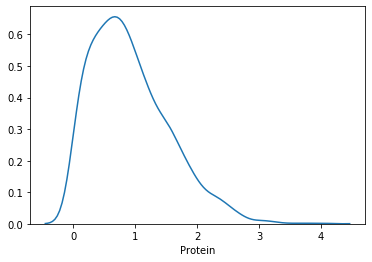

In [6]:
#Distribution of the columns 'Protein', 'Fat', 'vitaminC', 'Fibre'
sns.distplot(df['Protein'], hist=False)

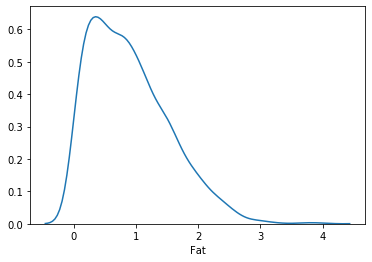

In [7]:
sns.distplot(df['Fat'], hist=False)

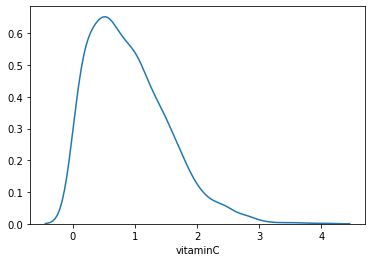

In [8]:
sns.distplot(df['vitaminC'], hist=False)

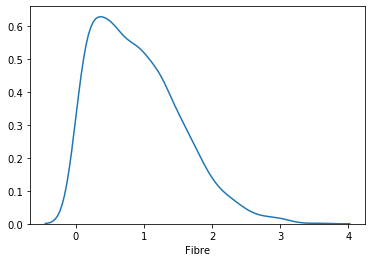

In [9]:
sns.distplot(df['Fibre'], hist=False)

#### Distributions look similar in all the columns of interest. 

#### 'S.No' & 'Product' columns are not required for Clustering. 

In [10]:
#Choosing only 'Protein', 'Fat', 'vitaminC' & 'Fibre' for Clustering
cluster_df = df.drop(['S.No', 'Product'], axis=1)
cluster_df.head()

,Protein,Fat,vitaminC,Fibre
0,0.452369,1.170926,1.079271,1.702960
1,2.321087,0.706856,0.350088,0.658249
2,0.884554,1.186571,2.428544,1.984562
3,0.715501,0.577599,0.270925,0.369266
4,0.132610,0.544521,0.116884,0.557309


#### Hierarchical Clustering - Agglomerative

In [11]:
#Performing Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(cluster_df, 'ward', metric='euclidean')
Z

array([[3.12000000e+02, 1.06100000e+03, 2.41103755e-02, 2.00000000e+00],
       [6.72000000e+02, 1.06600000e+03, 3.50400283e-02, 2.00000000e+00],
       [1.77000000e+02, 1.54900000e+03, 4.09211042e-02, 2.00000000e+00],
       ...,
       [3.48400000e+03, 3.48600000e+03, 1.96940113e+01, 1.04000000e+03],
       [3.48200000e+03, 3.48700000e+03, 2.76332047e+01, 7.06000000e+02],
       [3.48800000e+03, 3.48900000e+03, 3.30525698e+01, 1.74600000e+03]])

#### Dendrogram - To find the optimal clusters

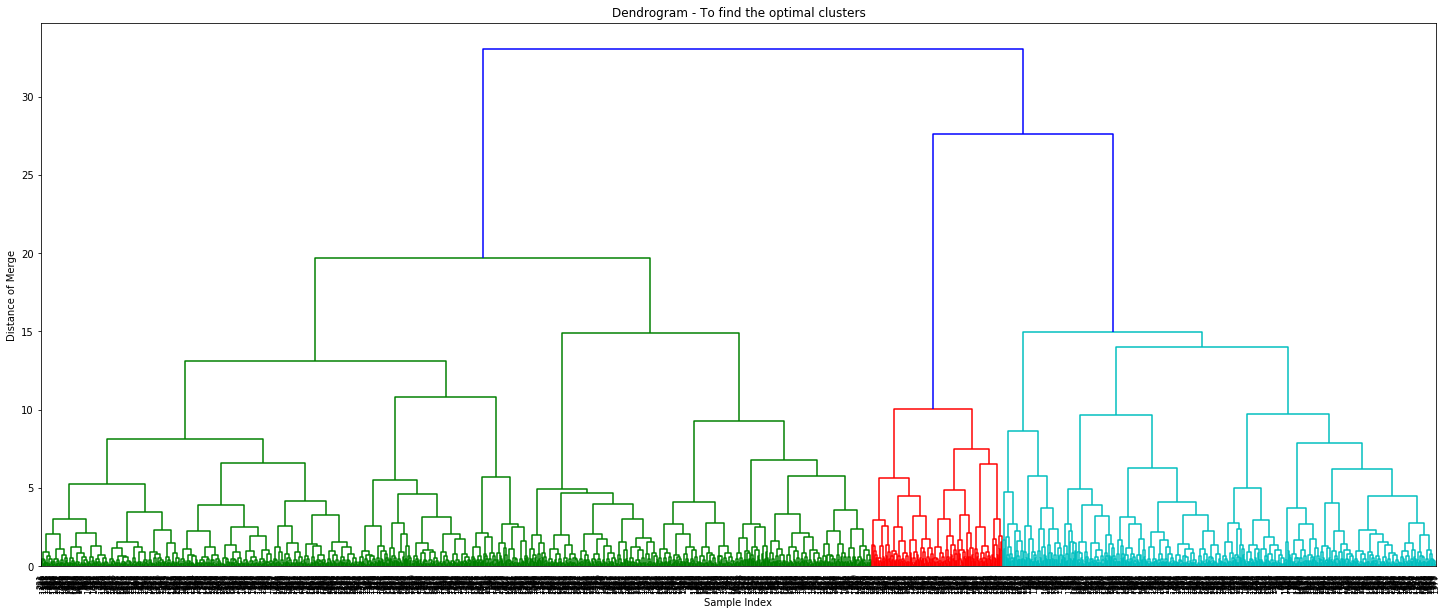

In [12]:
plt.figure(figsize=(25,10))
plt.title('Dendrogram - To find the optimal clusters')
plt.xlabel('Sample Index')
plt.ylabel('Distance of Merge')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

The entire view of the Dendrogram suggests there are 3 optimal clusters indicated by the colours Green, Red & Blue.

#### Dendrogram Truncated - Last 15 merges 

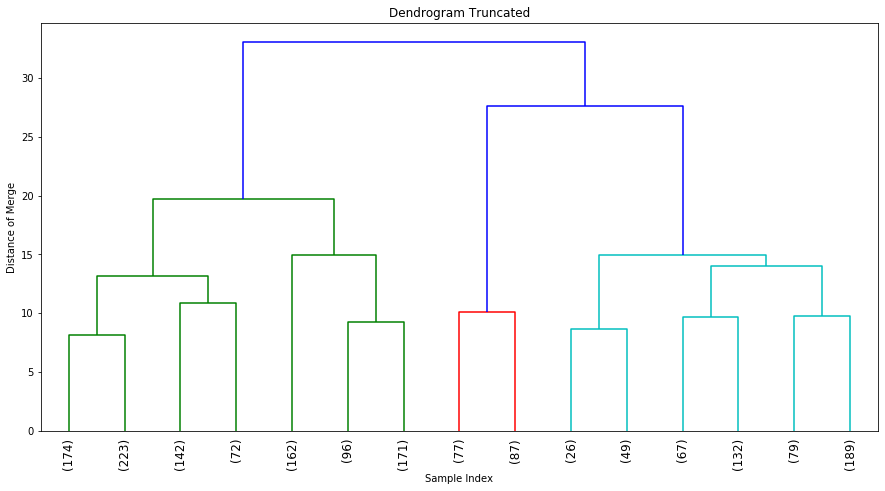

In [13]:
plt.figure(figsize=(15, 7.5))
plt.title('Dendrogram Truncated')
plt.xlabel('Sample Index')
plt.ylabel('Distance of Merge')

dendrogram(Z, truncate_mode='lastp', p=15, leaf_rotation=90., leaf_font_size=12.)
plt.show()

- The optimal number of clusters is 3.
- The cut-off line can be drawn anywhere between 20 units and 27 units.

#### Non-Hierarchical Clustering - K Means

In [14]:
#Performing Non-Hierarchical Clustering
from sklearn.cluster import KMeans
wss = []
K = range(1,11)
for i in K:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(cluster_df)
    wss.append(kmeans.inertia_)

#### WSS Plot

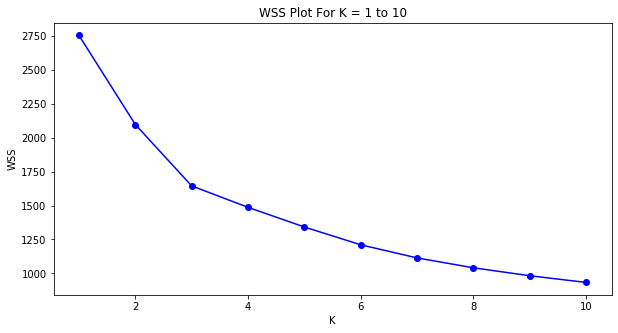

In [17]:
#Creating the WSS Plot
plt.figure(figsize=(10,5))
plt.title('WSS Plot For K = 1 to 10')
plt.xlabel('K')
plt.ylabel('WSS')
plt.plot(K, wss, '-bo')

- The drop in WSS is not very significant from K=3 to K=4.
- Therefore, the optimal number of clusters is 3. This goes with the outcome of Hierarchical Clustering as well.

#### Mapping the records to their respective clusters

In [18]:
#Building KMeans model with n_clusters = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
#Cluster Centroids
cluster_centres = kmeans.cluster_centers_

In [22]:
#Within Sum of Squares Variance when K=3
kmeans.inertia_

1644.792485653526

In [23]:
#Building 2nd run of KMeans model with n_clusters = 3 and centroids initialized with cluster_centres
kmeans = KMeans(n_clusters=3, init=cluster_centres)
kmeans.fit(cluster_df)

C:\Users\hari_\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True,
       init=array([[0.77094878, 0.80093253, 1.55462931, 1.54700071],
       [1.54216414, 1.57829585, 0.79242956, 0.82865462],
       [0.64260424, 0.55791461, 0.61067815, 0.59510675]]),
       max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [24]:
#Cluster Centroids
kmeans.cluster_centers_

array([[0.77094878, 0.80093253, 1.55462931, 1.54700071],
       [1.54216414, 1.57829585, 0.79242956, 0.82865462],
       [0.64260424, 0.55791461, 0.61067815, 0.59510675]])

In [25]:
#Within Sum of Squares Variance when K=3
kmeans.inertia_

1644.792485653526

In [26]:
#Generating the cluster labels
clusters = kmeans.labels_
clusters

array([0, 1, 0, ..., 2, 1, 1])

In [27]:
type(clusters)

numpy.ndarray

#### Adding the cluster labels to the original dataframe

In [28]:
#Creating a new column 'Clusters' in df
df['Clusters'] = clusters
df.head(10)

,S.No,Protein,Fat,vitaminC,Fibre,Product,Clusters
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with...",0
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks,1
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include...",0
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT",2
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned",2
5,6,1.267150,0.234292,0.546766,0.386447,"Alcoholic beverage, liqueur, coffee, 63 proof",2
6,7,0.351557,0.677176,0.551181,1.102799,"Alcoholic beverage, pina colada, canned",2
7,8,0.635325,1.223652,0.330483,0.675459,"Alcoholic beverage, tequila sunrise, canned",2
8,9,0.527588,1.250053,1.247867,0.889896,"Apples, raw, without skin",0
9,10,0.598690,0.068307,1.423195,0.339158,"Alcoholic beverage, whiskey sour, canned",2


In [29]:
#Dropping 'S.No' from df
df.drop('S.No', axis=1, inplace=True)
df.head(10)

,Protein,Fat,vitaminC,Fibre,Product,Clusters
0,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with...",0
1,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks,1
2,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include...",0
3,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT",2
4,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned",2
5,1.267150,0.234292,0.546766,0.386447,"Alcoholic beverage, liqueur, coffee, 63 proof",2
6,0.351557,0.677176,0.551181,1.102799,"Alcoholic beverage, pina colada, canned",2
7,0.635325,1.223652,0.330483,0.675459,"Alcoholic beverage, tequila sunrise, canned",2
8,0.527588,1.250053,1.247867,0.889896,"Apples, raw, without skin",0
9,0.598690,0.068307,1.423195,0.339158,"Alcoholic beverage, whiskey sour, canned",2


#### Characteristics of the 3 Clusters

In [30]:
df.groupby(['Clusters']).mean()

,Protein,Fat,vitaminC,Fibre
Clusters,,,,
0,0.770949,0.800933,1.554629,1.547001
1,1.542164,1.578296,0.792430,0.828655
2,0.642604,0.557915,0.610678,0.595107


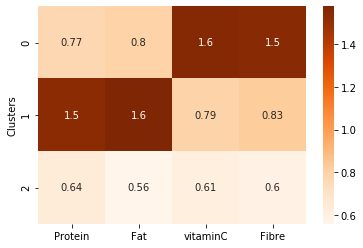

In [32]:
#Heatmap of the characteristics of 3 clusters
sns.heatmap((df.groupby(['Clusters']).mean()), annot=True, cmap='Oranges')

#### Cluster Characteristics

- Cluster 0 - Products high in 'vitaminC' and 'Fibre'
- Cluster 1 - Products high in 'Protein' and 'Fat'
- Cluster 2 - Products neither high in 'Protein' nor 'Fat' nor 'vitaminC' nor 'Fibre'

#### Cluster labels 0,1 and 2 can be replaced by names 'Weight Reduction Products', 'Weight Gain Products' and 'Junk' respectively. Choosing a name for the clusters in highly qualitative. 